# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# 1-Handling missing data

In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean["Precip Type"] = data["Precip Type"].fillna(data["Precip Type"].mode()[0])
data_clean.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
data_clean.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# 2-Encoding Categorical Data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, 3].values
data_clean.drop("Temperature (C)",axis=1,inplace = True)
data_clean.drop("Formatted Date",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(96453, 10)

In [8]:
X[0]

array(['Partly Cloudy', 'rain', 7.388888888888887, 0.89, 14.1197, 251.0,
       15.826300000000002, 0.0, 1015.13,
       'Partly cloudy throughout the day.'], dtype=object)

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,9])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [11]:
print(X.shape)
print(y.shape)

(96453, 250)
(96453,)


# 3-Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Multiple Liner Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
import sklearn.metrics as sm
Y_pred = lr.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 0.71
Mean squared error train= 0.83
Median absolute error train= 0.59
Explain variance score train= 0.99
R2 score train= 0.99


In [18]:
Y_pred = lr.predict(X_test)
print("Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 

Mean absolute error test = 8046086866.92
Mean squared error test= 1.2488899618446394e+24
Median absolute error test= 0.59


## Predicting the Test set results

In [22]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[14.19 14.42]
 [13.39 12.16]
 [23.23 23.96]
 ...
 [ 0.5  -1.  ]
 [ 8.38  7.33]
 [16.2  16.06]]


## Visualising the Multiple Linear Regression results

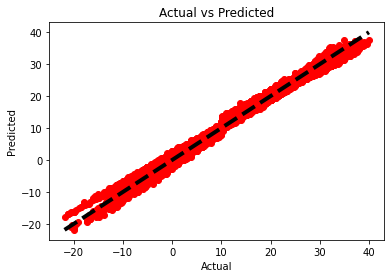

In [23]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = lr.predict(X_train)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()